In [1]:
from __future__ import print_function
import sys
import os
import math
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split#split
%matplotlib inline

In [2]:
##数据处理部分
def shuffle_data(X, y, seed=None):
    if seed:
        np.random.seed(seed)
        idx = np.arange(X.shape[0])
        np.random.shuffle(idx)
        return X[idx], y[idx]
    
# 正规化数据集 X,l2范数,按行,使每个sample范数为1
def normalize(X, axis=-1, p=2):
    lp_norm = np.atleast_1d(np.linalg.norm(X, p, axis,keepdims =True))
    lp_norm[lp_norm == 0] = 1
    return X #/ np.expand_dims(lp_norm, axis)

# 标准化数据集 X,按列（属性）,
def standardize(X):
    X_std = np.zeros(X.shape)
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    # 分母不能等于 0 的情形
    # X_std = (X - X.mean(axis=0)) / X.std(axis=0)
    for col in range(np.shape(X)[1]):
        if std[col]:
            X_std[:, col] = (X_std[:, col] - mean[col]) / std[col]
    return X_std

# 划分数据集为训练集和测试集
# def train_test_split(X, y, test_size=0.2, shuffle=True, seed=None):
#     if shuffle:
#         X, y = shuffle_data(X, y, seed)
    
#     n_train_samples = int(X.shape[0] * (1-test_size))
#     x_train, x_test = X[:n_train_samples], X[n_train_samples:]
#     y_train, y_test = y[:n_train_samples], y[n_train_samples:]
    
#     return x_train, x_test, y_train, y_test

def accuracy(y, y_pred):
    y = y.reshape(y.shape[0], -1)
    y_pred = y_pred.reshape(y_pred.shape[0], -1)
    return np.sum(y == y_pred)/len(y)

In [3]:
class KNN():
    def __init__(self, k=5):
        self.k = k
        
    # 计算一个样本与训练集中所有样本的欧氏距离的平方
    def euclidean_distance(self, one_sample, X_train):
        one_sample = one_sample.reshape(1, -1)
        X_train = X_train.reshape(X_train.shape[0], -1)
        distances = np.power(np.tile(one_sample, (X_train.shape[0], 1)) - X_train,
        2).sum(axis=1)
        return distances

    # 获取 k 个近邻的类别标签
    def get_k_neighbor_labels(self, distances, y_train, k):
        k_neighbor_labels = []
        for distance in np.sort(distances)[:k]:
            label = y_train[distances==distance]
            k_neighbor_labels.append(label)
        return np.array(k_neighbor_labels).reshape(-1, )
    
    # 进行标签统计，得票最多的标签就是该测试样本的预测标签
    def vote(self, one_sample, X_train, y_train, k):
        distances = self.euclidean_distance(one_sample, X_train)
        #print(distances.shape)
        y_train = y_train.reshape(y_train.shape[0], 1)
        k_neighbor_labels = self.get_k_neighbor_labels(distances, y_train, k)
        #print(k_neighbor_labels.shape)
        find_label, find_count = 0, 0
        for label, count in Counter(k_neighbor_labels).items():
            if count > find_count:
                find_count = count
                find_label = label
        return find_label
   
    # 对测试集进行预测
    def predict(self, X_test, X_train, y_train):
        y_pred = []
        for sample in X_test:
            label = self.vote(sample, X_train, y_train, self.k)
            y_pred.append(label)
  
            #print(y_pred)
        return np.array(y_pred)

In [15]:
def main():
    data = make_classification(n_samples=200, n_features=4, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2)
    X, y = data[0], data[1]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

    
    clf = KNN(k=5)
    y_pred = clf.predict(X_test, X_train, y_train)
    accu = accuracy(y_test, y_pred)
    print ("Accuracy:", accu)
if __name__ == "__main__":
    main()

Accuracy: 0.9848484848484849


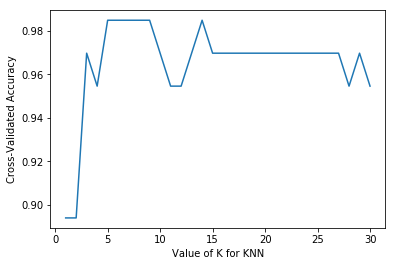

[0.8939393939393939,
 0.8939393939393939,
 0.9696969696969697,
 0.9545454545454546,
 0.9848484848484849,
 0.9848484848484849,
 0.9848484848484849,
 0.9848484848484849,
 0.9848484848484849,
 0.9696969696969697,
 0.9545454545454546,
 0.9545454545454546,
 0.9696969696969697,
 0.9848484848484849,
 0.9696969696969697,
 0.9696969696969697,
 0.9696969696969697,
 0.9696969696969697,
 0.9696969696969697,
 0.9696969696969697,
 0.9696969696969697,
 0.9696969696969697,
 0.9696969696969697,
 0.9696969696969697,
 0.9696969696969697,
 0.9696969696969697,
 0.9696969696969697,
 0.9545454545454546,
 0.9696969696969697,
 0.9545454545454546]

In [21]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

data = make_classification(n_samples=200, n_features=4, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2)
X, y = data[0], data[1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

k_range = range(1,31)
k_scores = []
for k in k_range:
    clf = KNN(k)
    y_pred = clf.predict(X_test, X_train, y_train)
    accu = accuracy(y_test, y_pred)
    #accu = round(accu,3)
    k_scores.append(accu)
plt.plot(k_range,k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
-
plt.show()
k_scores
